In [1]:
list_of_packages <- c("ggplot2", "dplyr", "tidyr", "circlize", "platetools")
for (package in list_of_packages) {
    suppressPackageStartupMessages(
        suppressWarnings(
            library(
                package,
                character.only = TRUE,
                quietly = TRUE,
                warn.conflicts = FALSE
            )
        )
    )
}
# Get the current working directory and find Git root
find_git_root <- function() {
    # Get current working directory
    cwd <- getwd()

    # Check if current directory has .git
    if (dir.exists(file.path(cwd, ".git"))) {
        return(cwd)
    }

    # If not, search parent directories
    current_path <- cwd
    while (dirname(current_path) != current_path) {  # While not at root
        parent_path <- dirname(current_path)
        if (dir.exists(file.path(parent_path, ".git"))) {
            return(parent_path)
        }
        current_path <- parent_path
    }

    # If no Git root found, stop with error
    stop("No Git root directory found.")
}

# Find the Git root directory
root_dir <- find_git_root()
cat("Git root directory:", root_dir, "\n")
figures_path <- file.path(root_dir, "figures/cell_count_plots/figures")
if (!dir.exists(figures_path)) {
    dir.create(figures_path, recursive = TRUE)
}

Git root directory: /home/lippincm/Documents/GFF_3D_organoid_profiling_pipeline 


In [2]:
sc_organoid_profile_path <- file.path(
    root_dir,
    "figures/cell_count_plots/results/sc_and_organoid_counts.parquet"
)
df <- arrow::read_parquet(sc_organoid_profile_path)
head(df)

patient,unit,dose,treatment,Well,single_cell_count,Area.Size.Shape_Organoid_VOLUME,cell_density,organoid_count
<chr>,<chr>,<int>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<int>
NF0014,%,1,DMSO,C4,49,46907832,1.044602e-06,3
NF0014,%,1,DMSO,D4,32,30849796,1.037284e-06,2
NF0014,%,1,DMSO,D9,67,54594908,1.227221e-06,4
NF0014,%,1,DMSO,E4,36,25798254,1.395443e-06,3
NF0014,%,1,DMSO,E9,16,14518149,1.102069e-06,2
NF0014,%,1,DMSO,F4,65,71790816,9.054083e-07,3


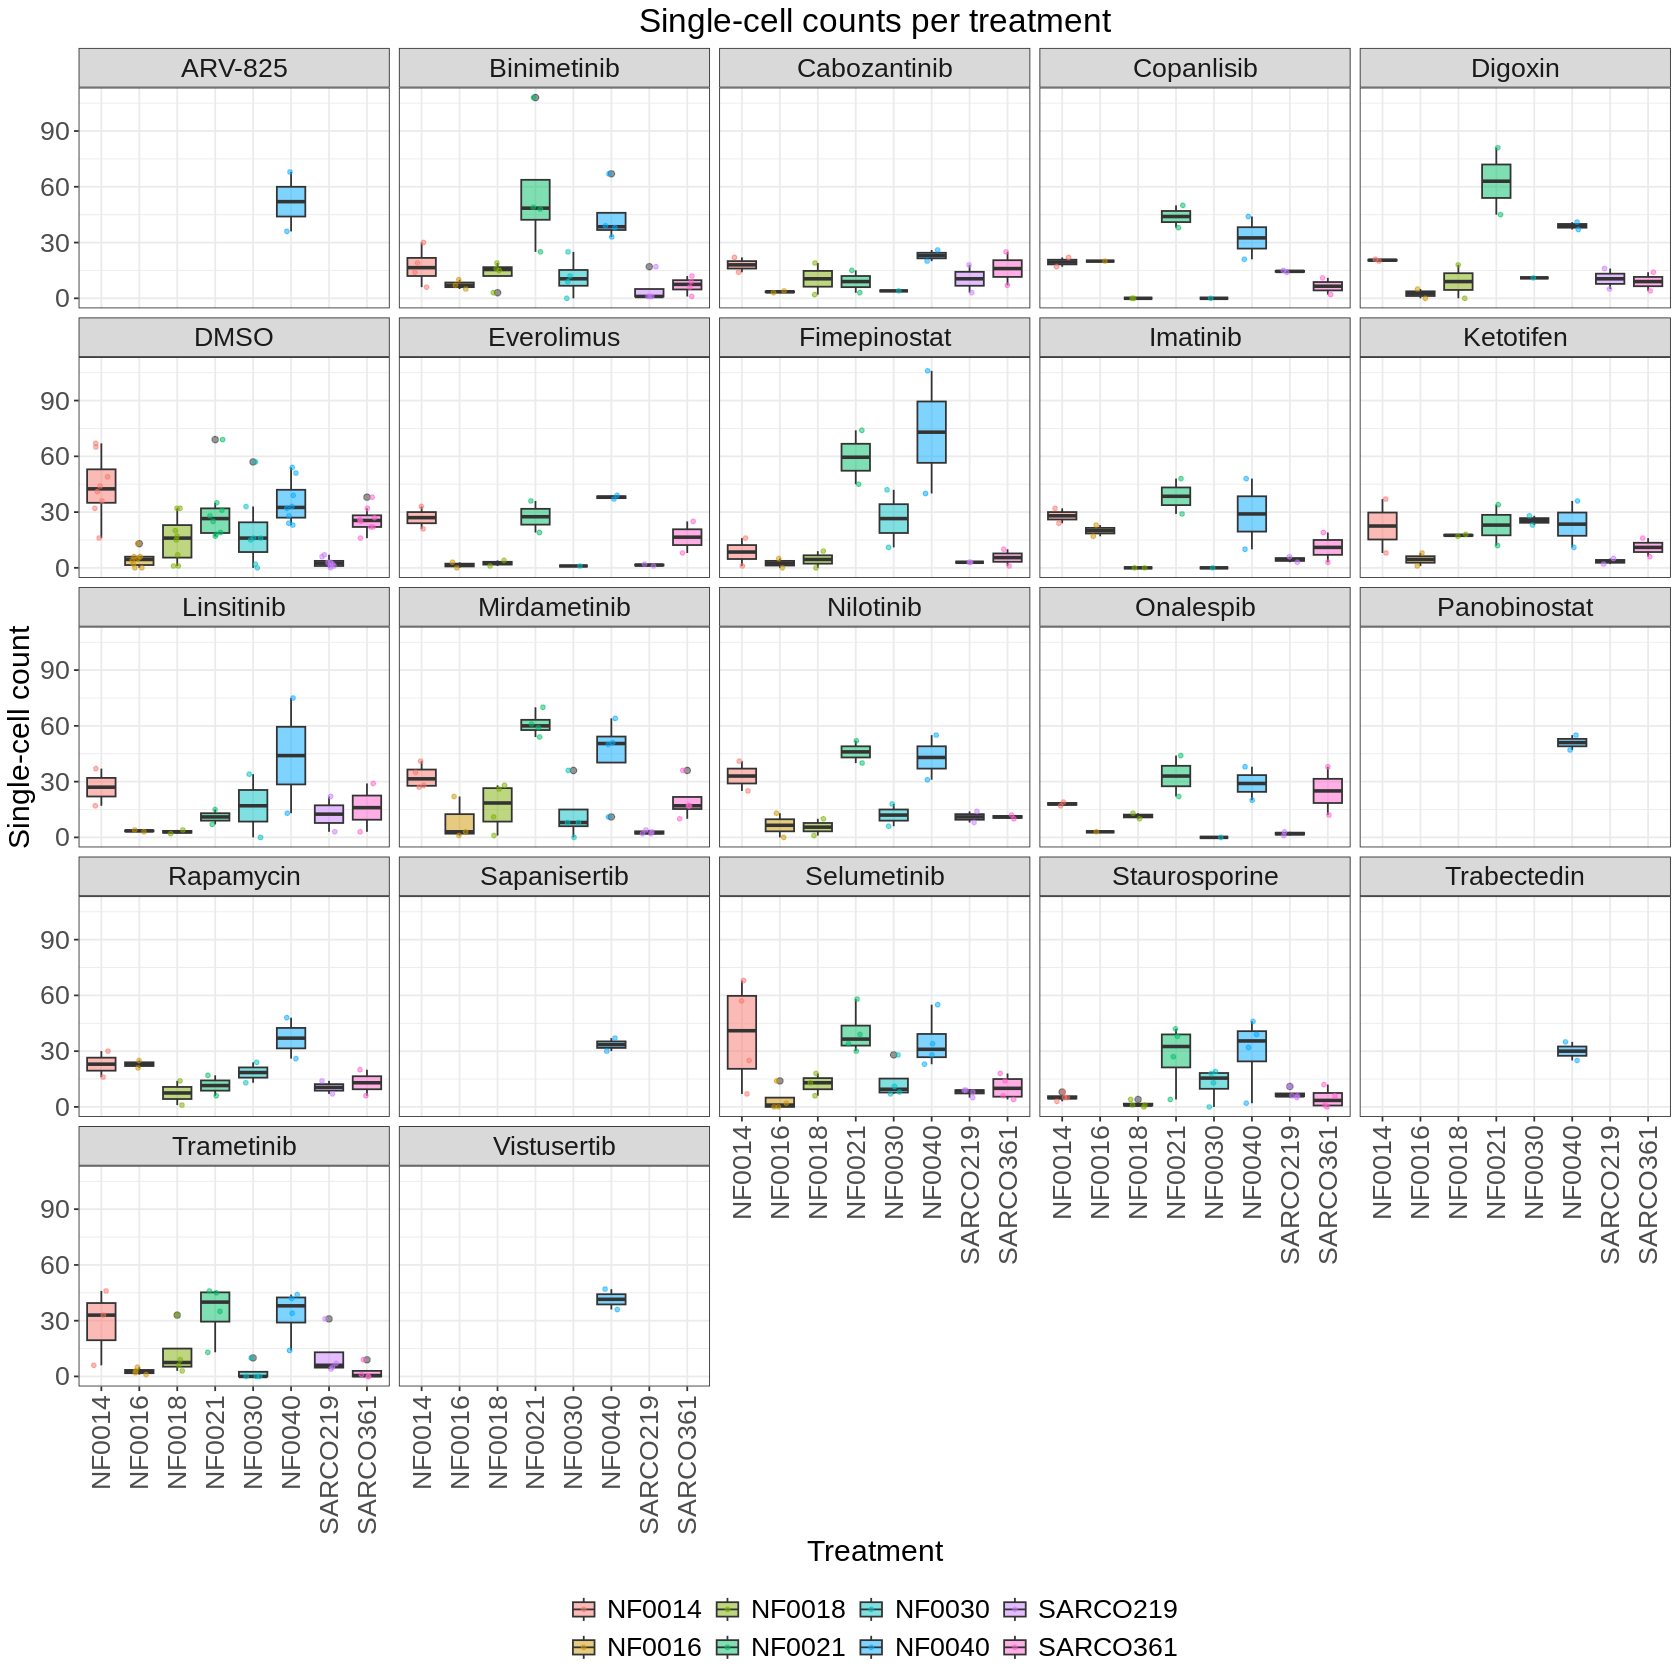

In [3]:
width <- 14
height <- 14
options(repr.plot.width = width, repr.plot.height = height)
single_cell_counts_plot <- (
    ggplot(
        data = df,
        aes(x = patient, y = single_cell_count, fill = patient)
    )
    + geom_boxplot(alpha = 0.5)
    + geom_jitter(
        aes(color = patient),
        size = 1,
        alpha = 0.5,
        width = 0.2,
        height = 0

    )
    + labs(
        title = "Single-cell counts per treatment",
        x = "Treatment",
        y = "Single-cell count"
    )
    + theme_bw()
    + theme(
        axis.text.x = element_text(angle = 90, hjust = 1, vjust = 0.5, size = 16),
        axis.text.y = element_text(size = 16),
        axis.title.x = element_text(size = 18),
        axis.title.y = element_text(size = 18),
        plot.title = element_text(size = 20, hjust = 0.5),
        legend.title = element_blank(),
        legend.text = element_text(size = 16),
        strip.text = element_text(size = 16),
        legend.position = "bottom"
    )
    + facet_wrap(~ treatment, ncol = 5)
)  
ggsave(
    plot = single_cell_counts_plot,
    filename = file.path(figures_path, "single_cell_counts_per_treatment.png"),
    width = width,
    height = height
)
single_cell_counts_plot

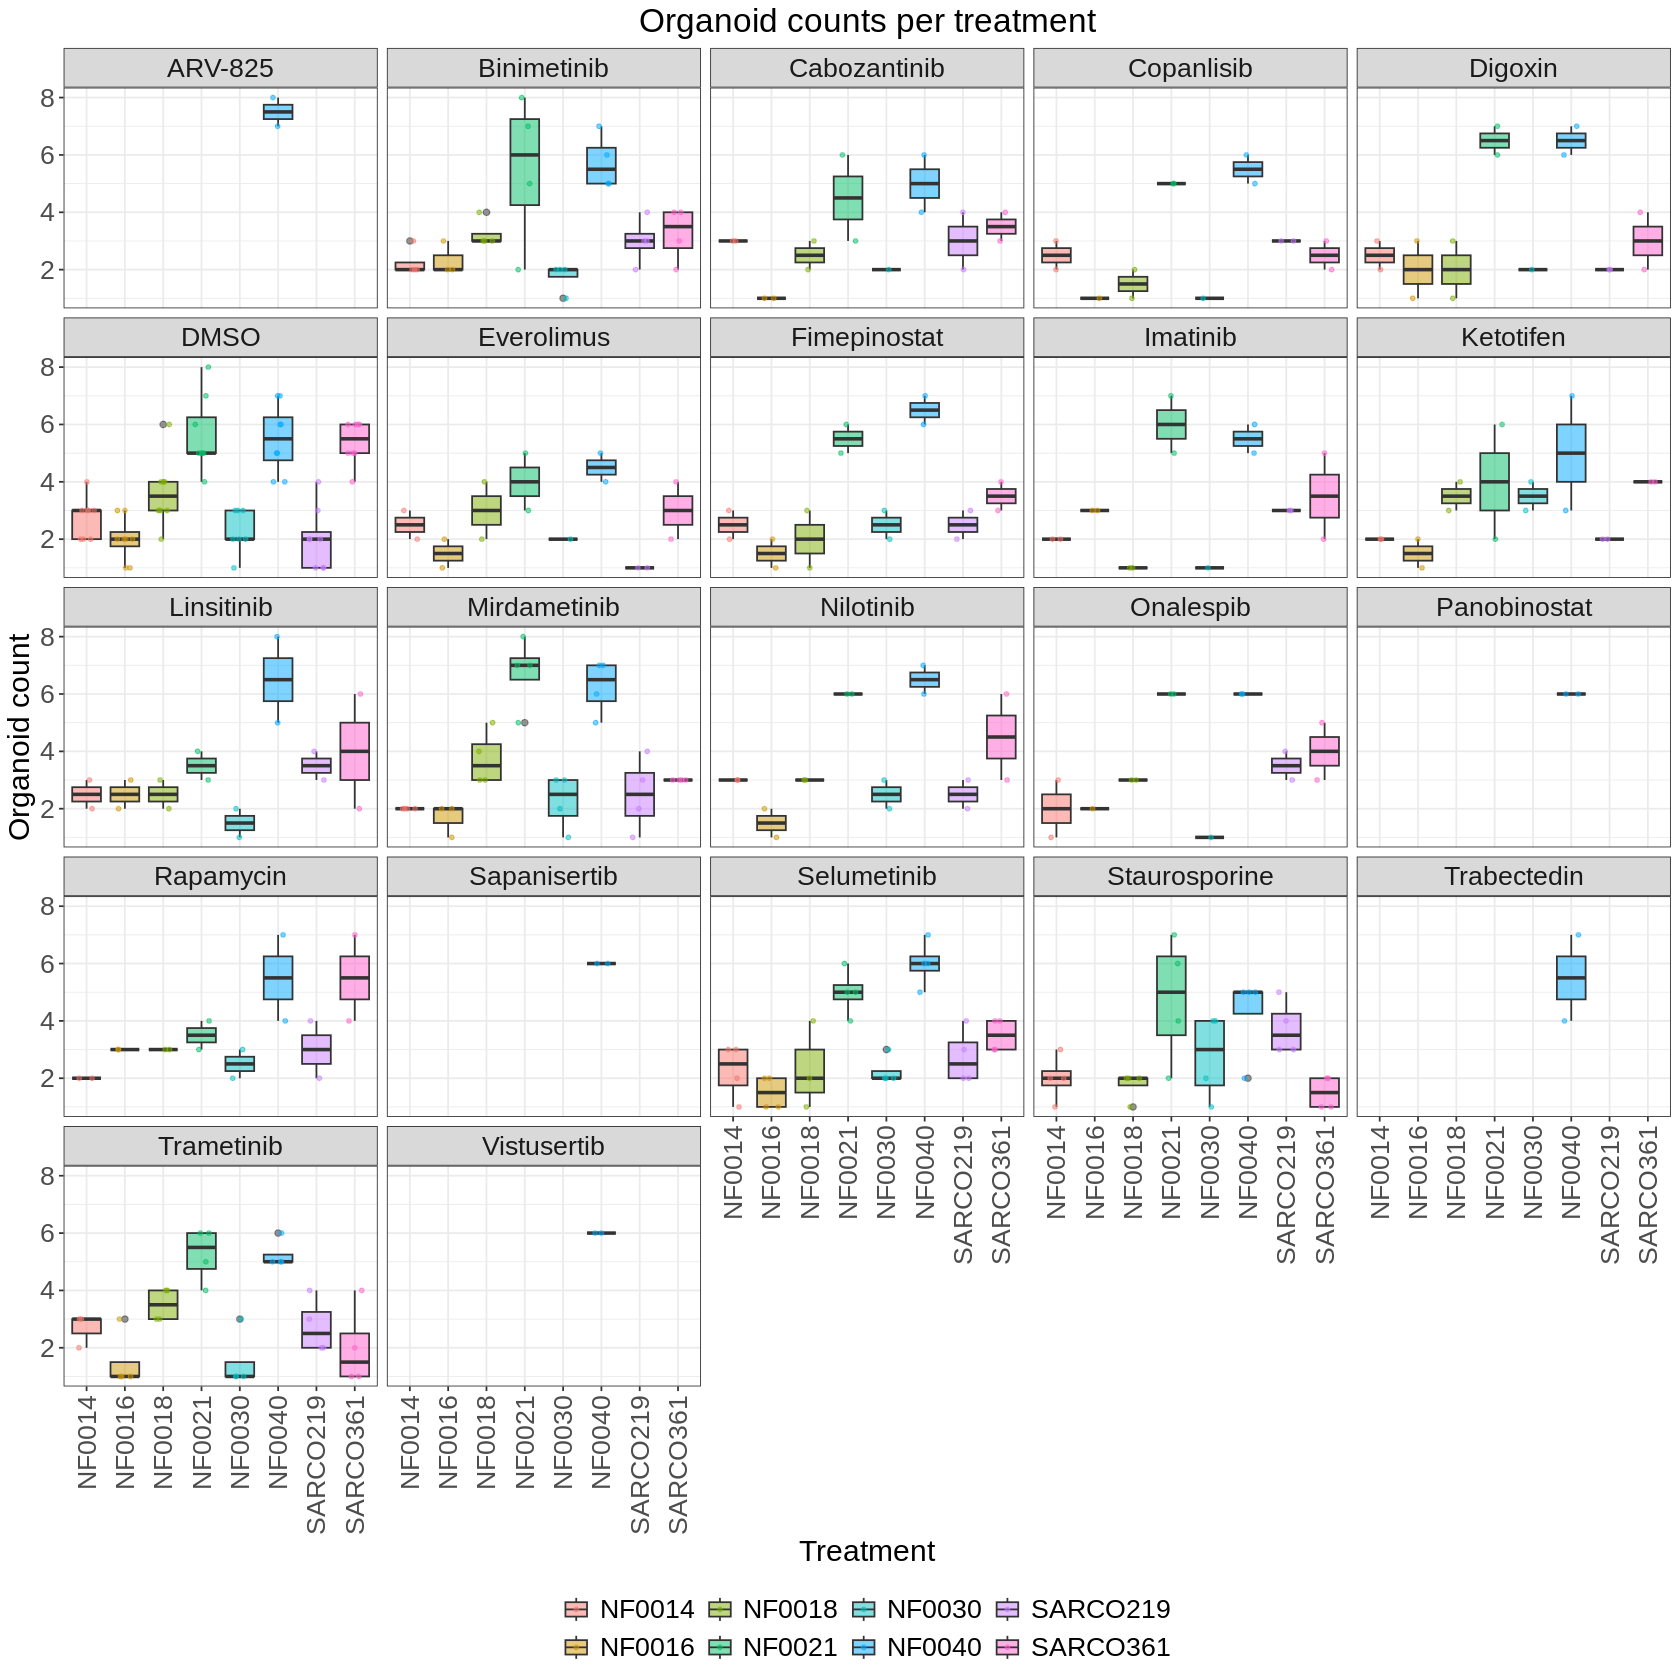

In [4]:
width <- 14
height <- 14
options(repr.plot.width = width, repr.plot.height = height)
organoid_cell_counts_plot <- (
    ggplot(
        data = df,
        aes(x = patient, y = organoid_count, fill = patient)
    )
    + geom_boxplot(alpha = 0.5)
    + geom_jitter(
        aes(color = patient),
        size = 1,
        alpha = 0.5,
        width = 0.2,
        height = 0

    )
    + labs(
        title = "Organoid counts per treatment",
        x = "Treatment",
        y = "Organoid count"
    )
    + theme_bw()
    + theme(
        axis.text.x = element_text(angle = 90, hjust = 1, vjust = 0.5, size = 16),
        axis.text.y = element_text(size = 16),
        axis.title.x = element_text(size = 18),
        axis.title.y = element_text(size = 18),
        plot.title = element_text(size = 20, hjust = 0.5),
        legend.title = element_blank(),
        legend.text = element_text(size = 16),
        strip.text = element_text(size = 16),
        legend.position = "bottom"
    )
    + facet_wrap(~ treatment, ncol = 5)
)   
ggsave(
    plot = organoid_cell_counts_plot,
    filename = file.path(figures_path, "organoid_counts_per_treatment.png"),
    width = width,
    height = height
)
organoid_cell_counts_plot

Warning message:
“Removed 8 rows containing non-finite outside the scale range
(`stat_boxplot()`).”
Warning message:
“Removed 8 rows containing missing values or values outside the scale range
(`geom_point()`).”
Warning message:
“Removed 8 rows containing missing values or values outside the scale range
(`geom_point()`).”
Warning message:
“Removed 8 rows containing non-finite outside the scale range
(`stat_boxplot()`).”
Warning message:
“Removed 8 rows containing non-finite outside the scale range
(`stat_boxplot()`).”
Warning message:
“Removed 8 rows containing missing values or values outside the scale range
(`geom_point()`).”
Warning message:
“Removed 8 rows containing missing values or values outside the scale range
(`geom_point()`).”


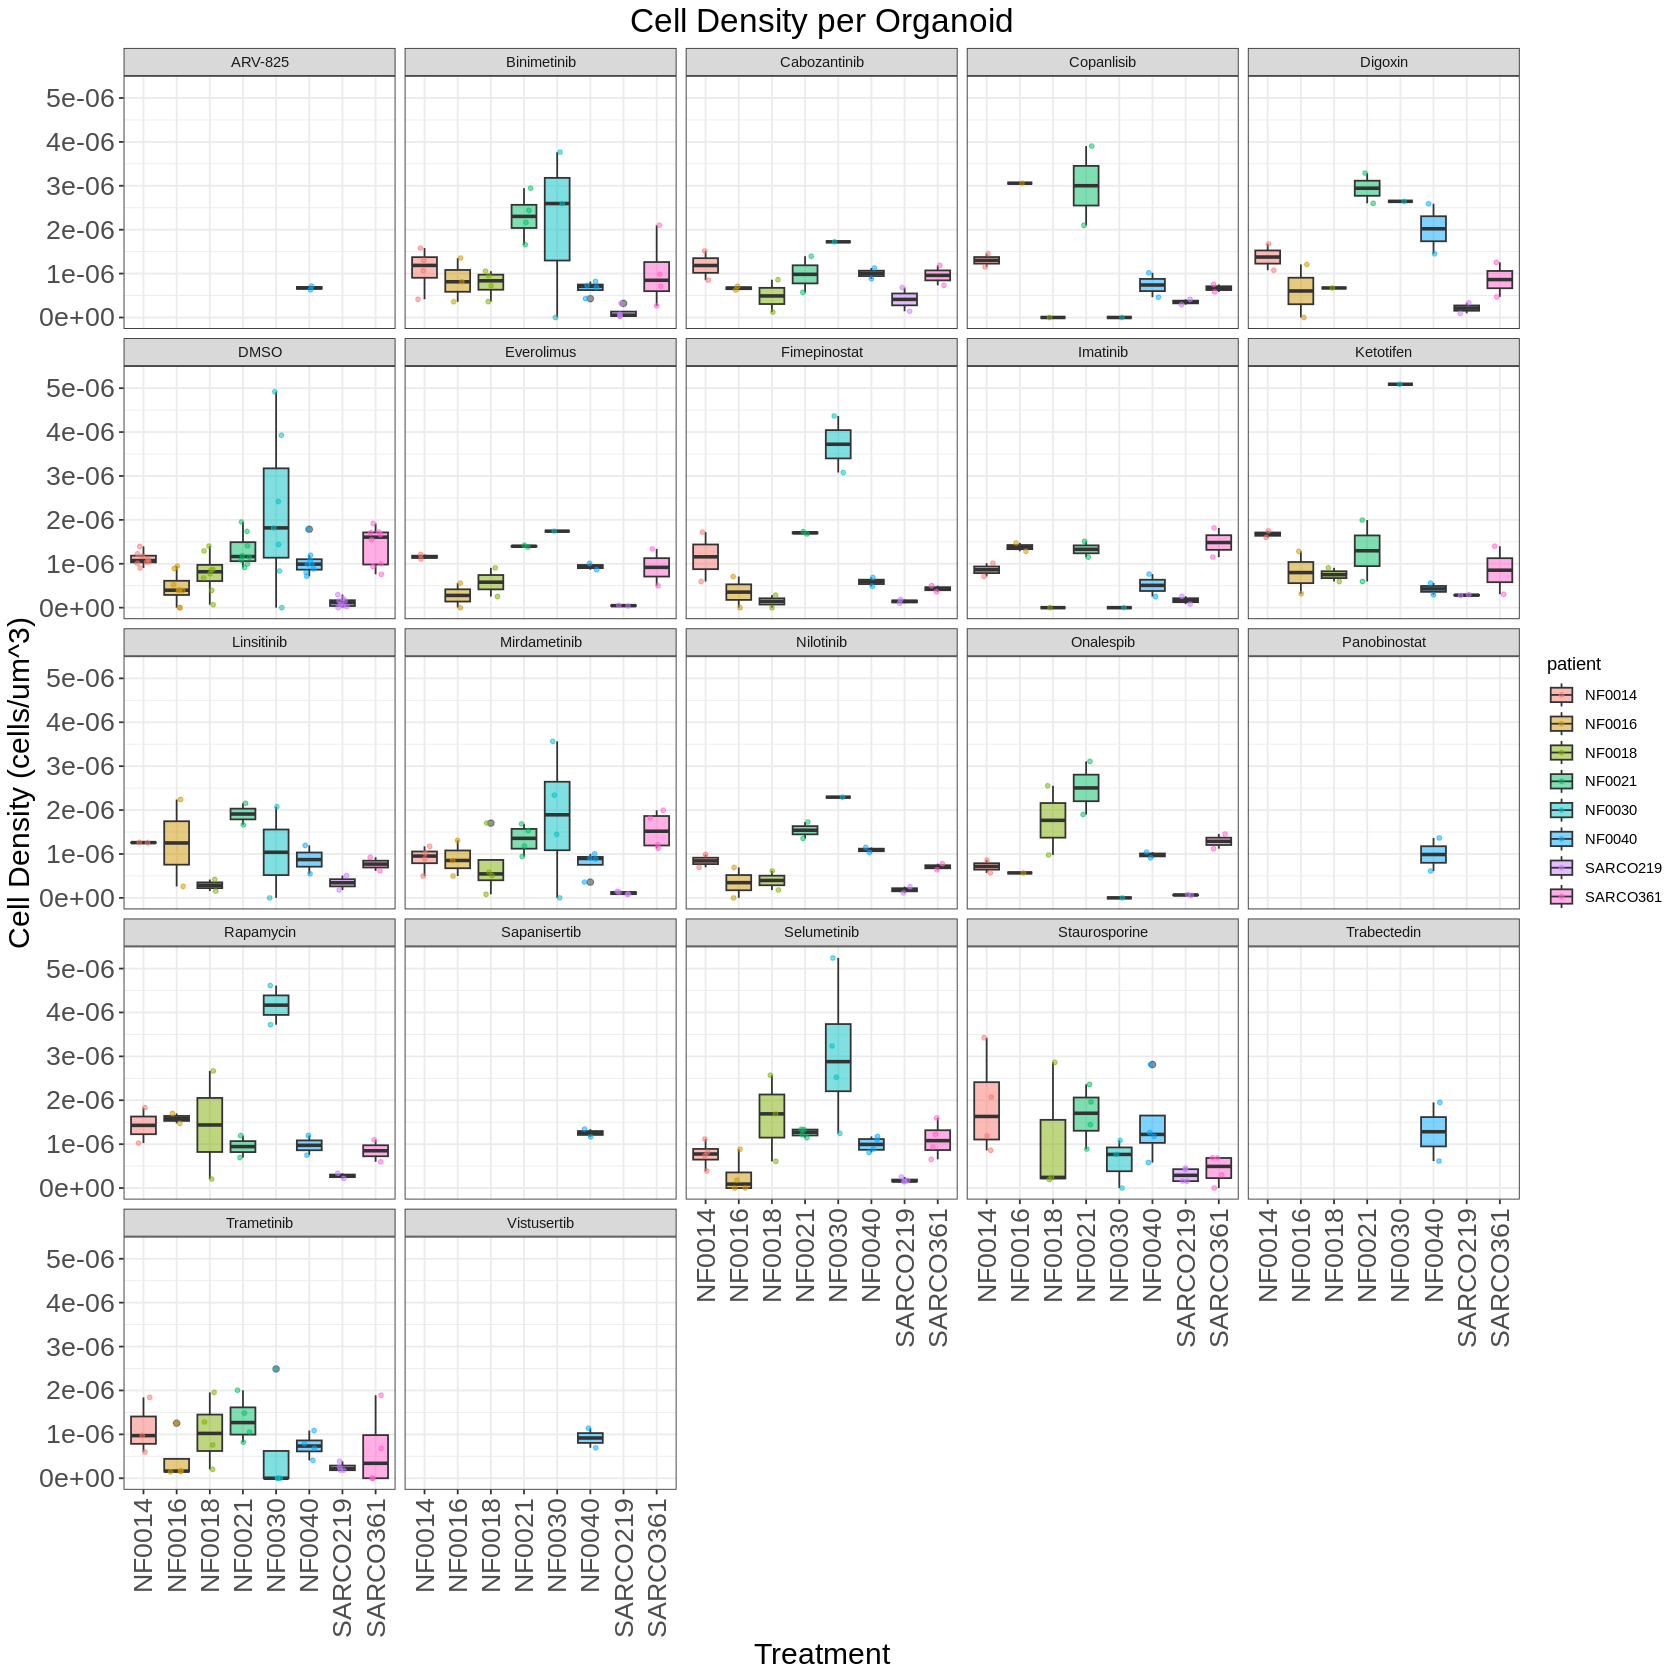

In [5]:
width <- 14
height <- 14
options(repr.plot.width = width, repr.plot.height = height)
cell_count_volume_ratio_plot <- (
    ggplot(
        data = df,
        aes(x = patient, y = cell_density)
    )
    + geom_boxplot(aes(fill = patient), alpha = 0.5)
    + geom_jitter(
        aes(color = patient),
        size = 1,
        alpha = 0.5,
        width = 0.2,
        height = 0    )
    + labs(
        title = "Cell Density per Organoid",
        x = "Treatment",
        y = "Cell Density (cells/um^3)"
    )
    + theme_bw()
    + ylim(c(0, quantile(df$cell_density, 0.99, na.rm = TRUE)))  # Fixed: added na.rm = TRUE
    + theme(
        axis.text.x = element_text(angle = 90, hjust = 1, vjust = 0.5, size = 16),
        axis.text.y = element_text(size = 16),
        axis.title.x = element_text(size = 18),
        axis.title.y = element_text(size = 18),
        plot.title = element_text(size = 20, hjust = 0.5),  
    )
    + facet_wrap(~ treatment, ncol = 5)
)
ggsave(
    plot = cell_count_volume_ratio_plot,
    filename = file.path(figures_path, "cell_density_per_organoid.png"),
    width = width,
    height = height
)
cell_count_volume_ratio_plot

Warning message:
“Warning: Your well label count ( 42 ) covers less than half the selected plate( 96 ).
Are you sure argument 'plate' is correct for the number of wells in your data?
note: Default is a 96-well plate.”


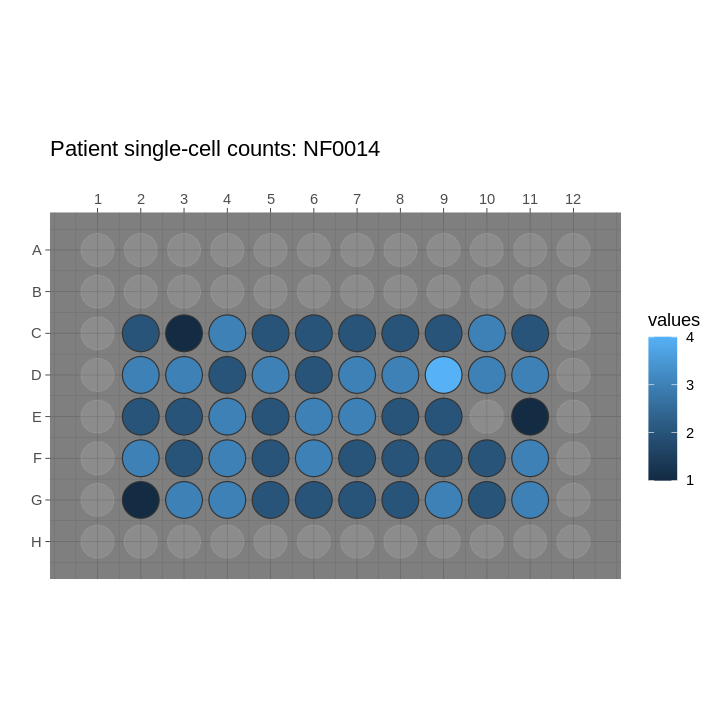

Warning message:
“Warning: Your well label count ( 42 ) covers less than half the selected plate( 96 ).
Are you sure argument 'plate' is correct for the number of wells in your data?
note: Default is a 96-well plate.”


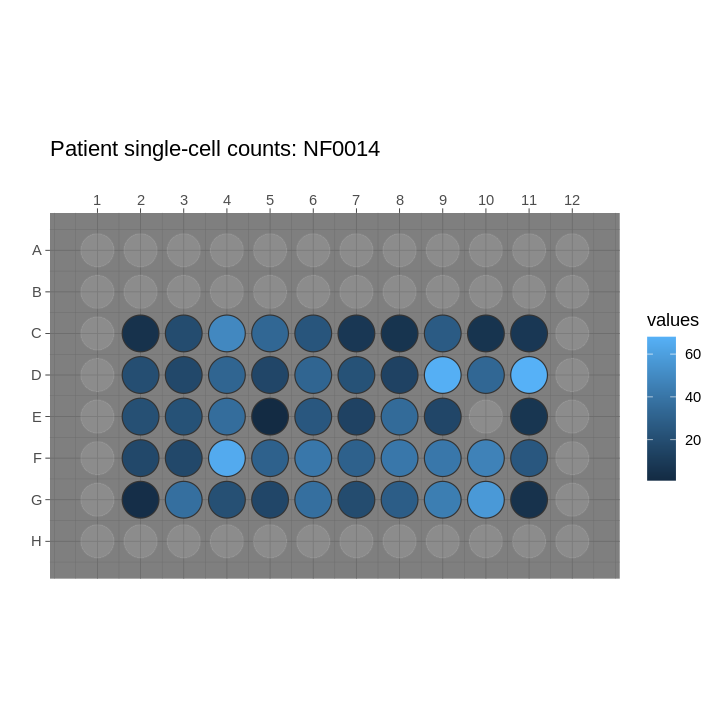

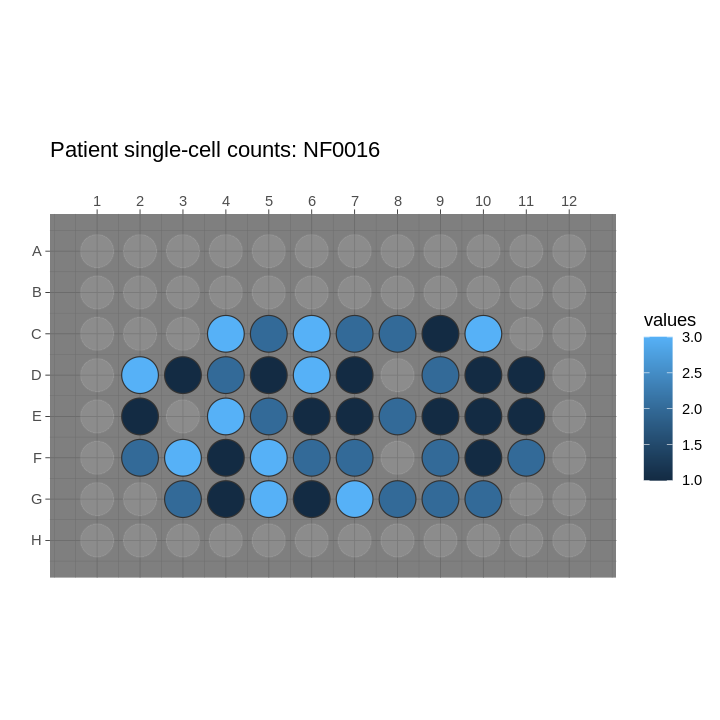

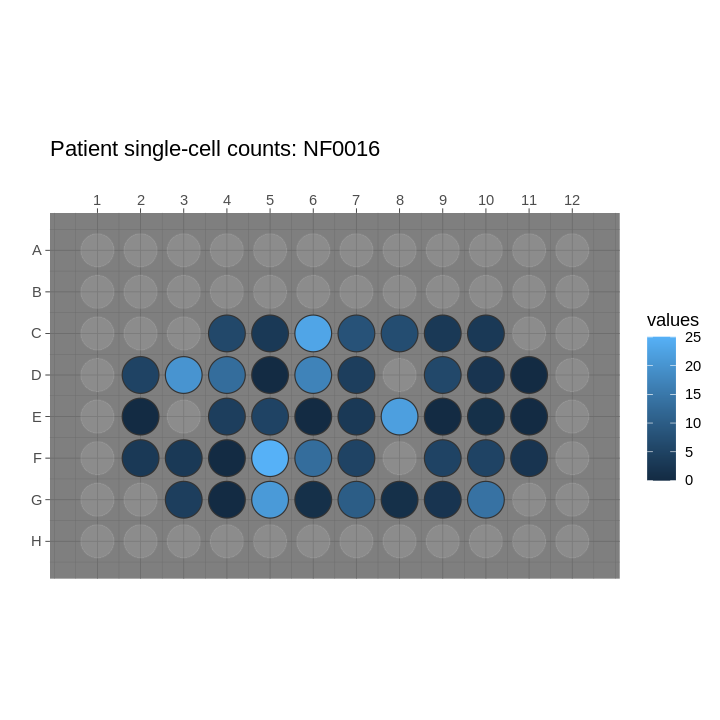

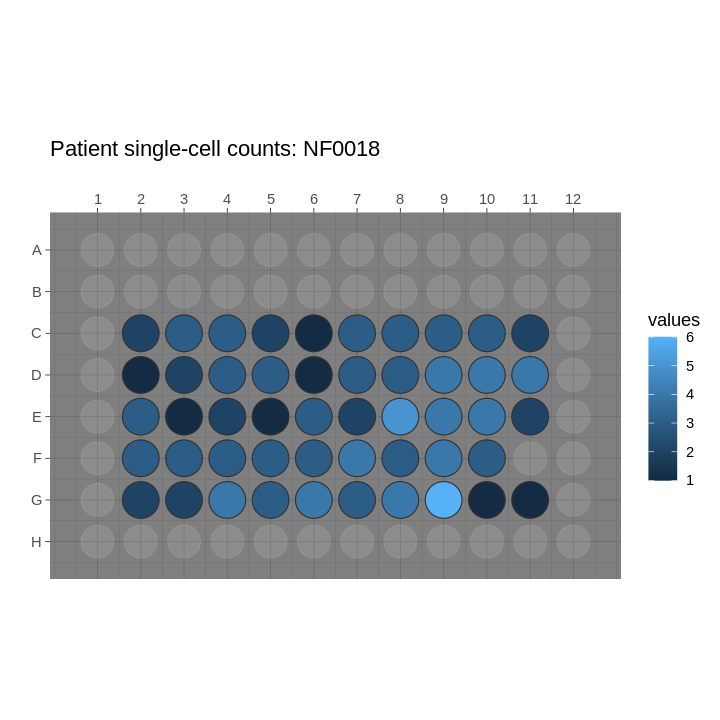

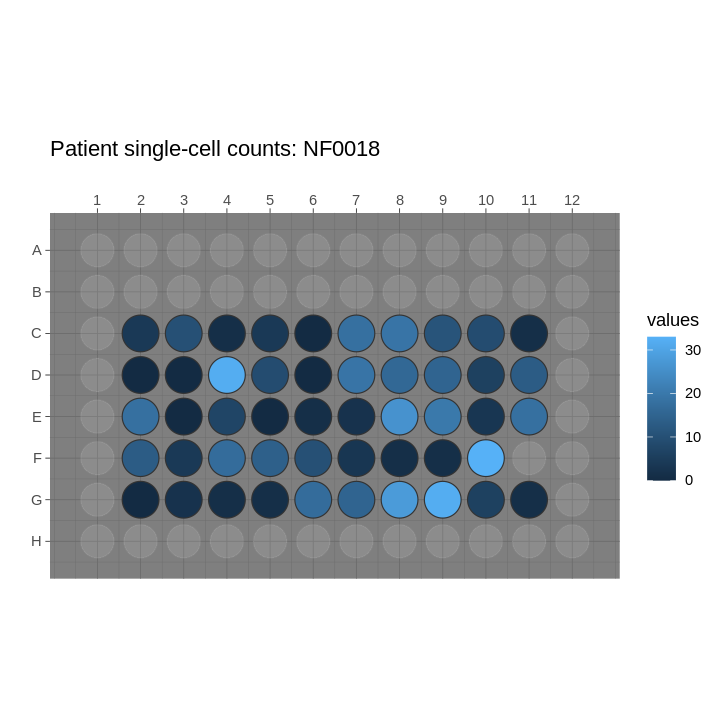

Warning message:
“Warning: Your well label count ( 43 ) covers less than half the selected plate( 96 ).
Are you sure argument 'plate' is correct for the number of wells in your data?
note: Default is a 96-well plate.”


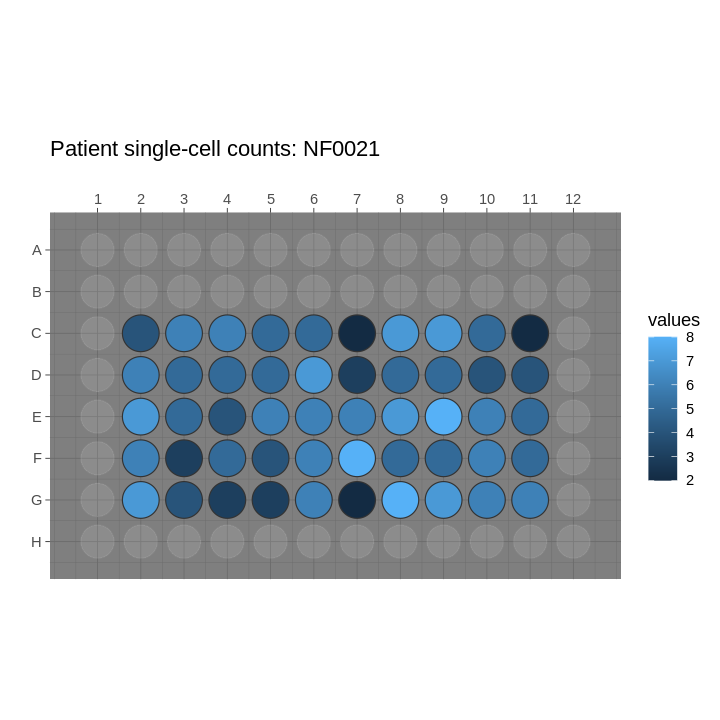

Warning message:
“Warning: Your well label count ( 43 ) covers less than half the selected plate( 96 ).
Are you sure argument 'plate' is correct for the number of wells in your data?
note: Default is a 96-well plate.”


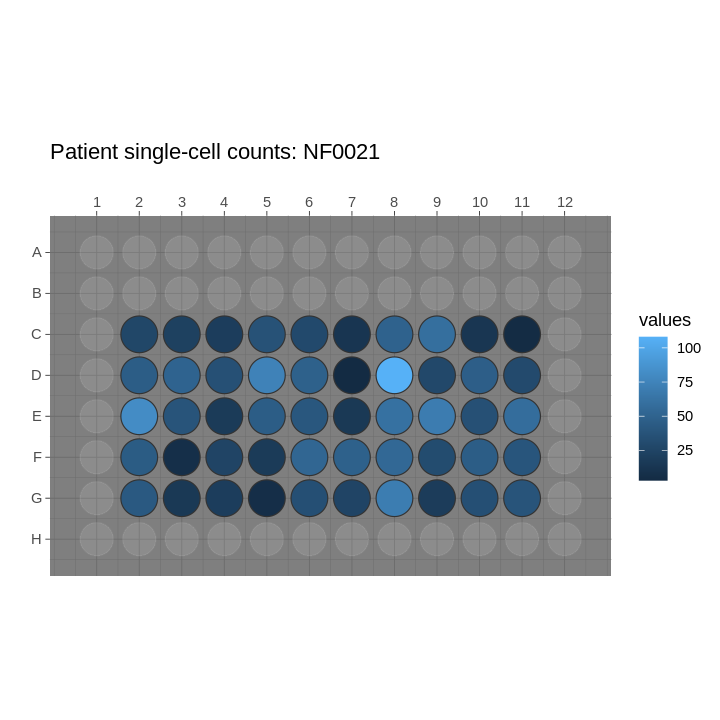

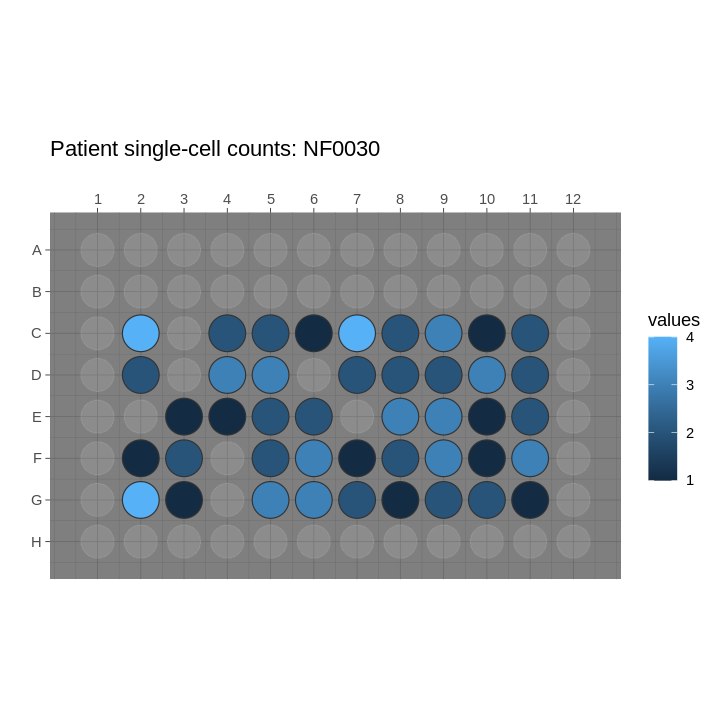

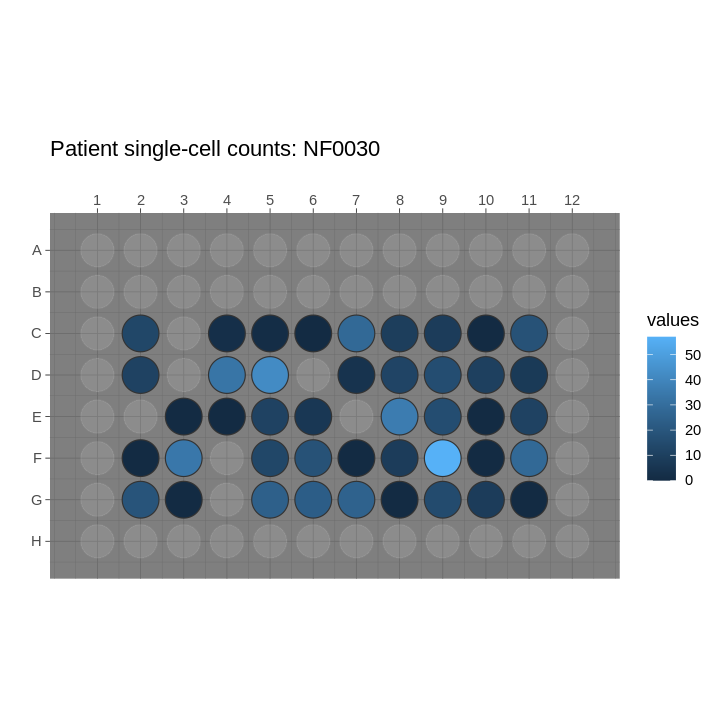

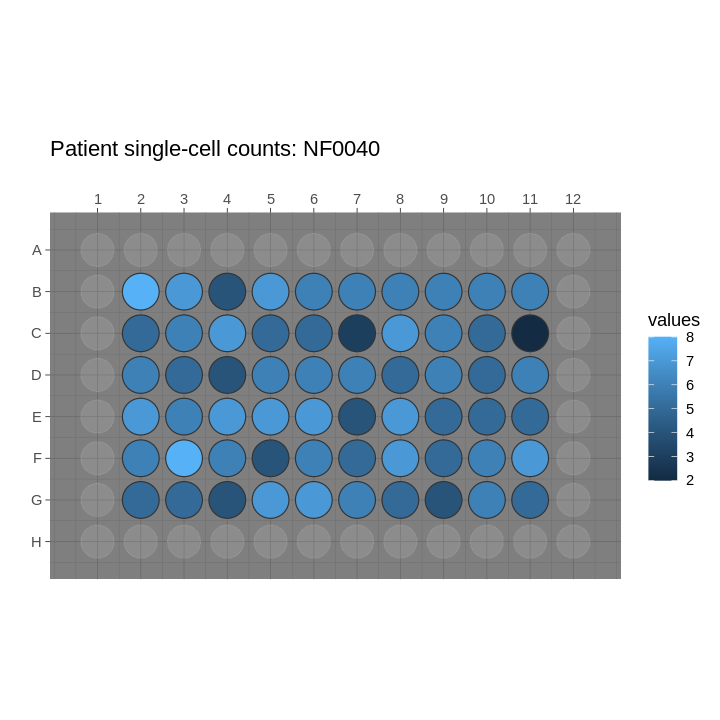

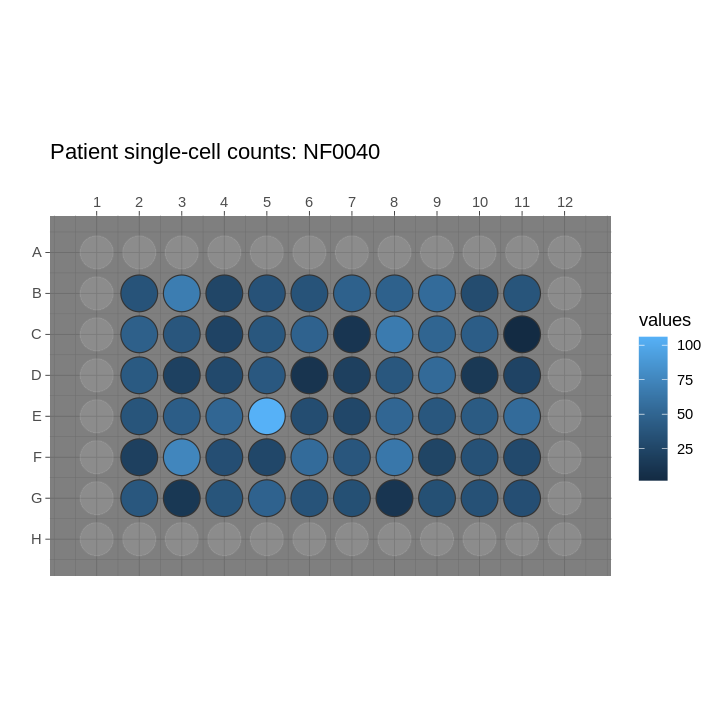

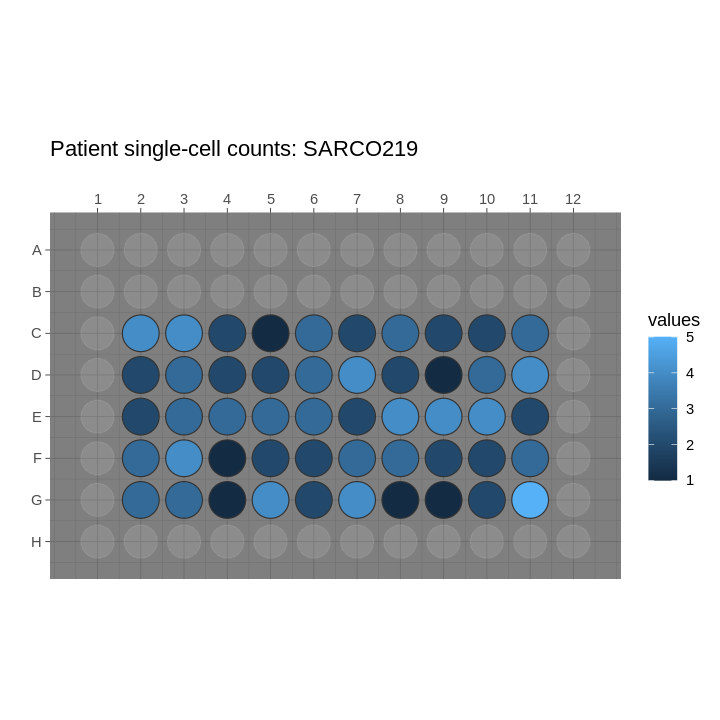

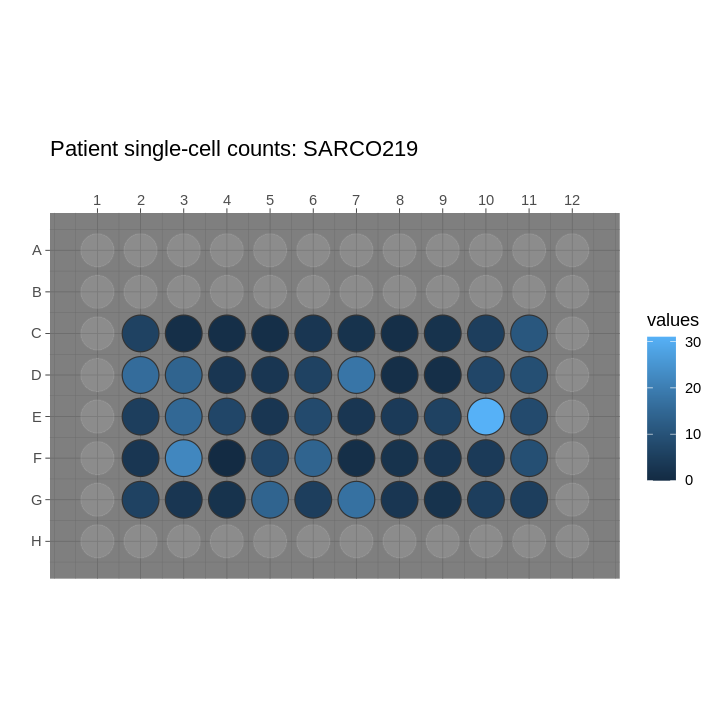

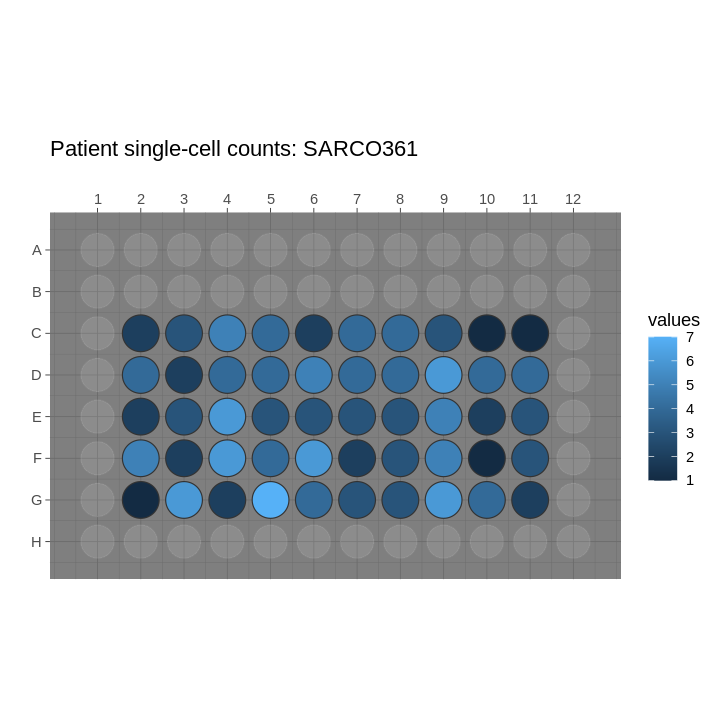

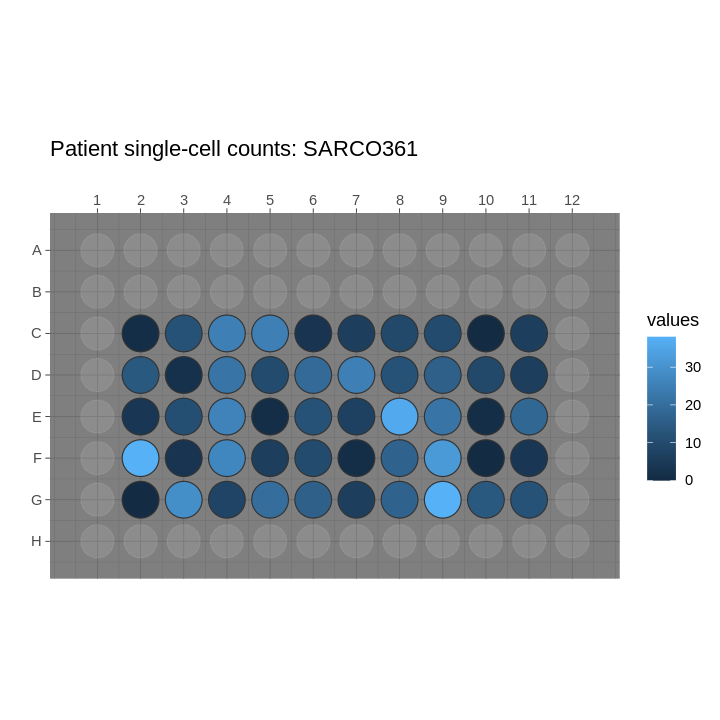

In [6]:
width <- 6
height <- 6
options(repr.plot.width = width, repr.plot.height = height) 
for (patient_id in unique(df$patient)) {
    patient_df <- df[df$patient == patient_id, ]

    plot <- (raw_map(data = patient_df$organoid_count,
            well = patient_df$Well,
            plate = 96)
        + ggtitle(paste0("Patient single-cell counts: ", patient_id))
        + theme_dark())
    ggsave(
        filename = file.path(figures_path, paste0("platemap_organoid_counts_", patient_id, ".png")),
        plot = plot,
        width = width,
        height = height
    )
    print(plot)
    plot <- (raw_map(data = patient_df$single_cell_count,
            well = patient_df$Well,
            plate = 96)
        + ggtitle(paste0("Patient single-cell counts: ", patient_id))
        + theme_dark())
    ggsave(
        filename = file.path(figures_path, paste0("platemap_sc_counts_", patient_id, ".png")),
        plot = plot,
        width = width,
        height = height
    )
    print(plot)
}